Name: Anushree Patil

Github Username: Anushreepa

USC ID: 8671674031

## 1. Tree-Based Methods

Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
import warnings
warnings.filterwarnings('ignore')

### (a) Download the APS Failure data

In [2]:
traindf = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20)
testdf = pd.read_csv('../data/aps_failure_test_set.csv',skiprows=20)

In [3]:
traindf['class']=traindf['class'].replace('neg',0)
traindf['class']=traindf['class'].replace('pos',1)
testdf['class']=testdf['class'].replace('neg',0)
testdf['class']=testdf['class'].replace('pos',1)

In [4]:
traindf

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0          0   76698     na  2130706438    280      0      0      0      0   
1          0   33058     na           0     na      0      0      0      0   
2          0   41040     na         228    100      0      0      0      0   
3          0      12      0          70     66      0     10      0      0   
4          0   60874     na        1368    458      0      0      0      0   
...      ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995      0  153002     na         664    186      0      0      0      0   
59996      0    2286     na  2130706538    224      0      0      0      0   
59997      0     112      0  2130706432     18      0      0      0      0   
59998      0   80292     na  2130706432    494      0      0      0      0   
59999      0   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384   721044   469792   339156  157956   73224   
1          0  ...   421400  178064   293306   245416   133654   81140   97576   
2          0  ...   277378  159812   423992   409564   320746  158022   95128   
3          0  ...      240      46       58       44       10       0       0   
4          0  ...   622012  229790   405298   347188   286954  311560  433954   
...      ...  ...      ...     ...      ...      ...      ...     ...     ...   
59995      0  ...   998500  566884  1290398  1218244  1019768  717762  898642   
59996      0  ...    10578    6760    21126    68424      136       0       0   
59997      0  ...      792     386      452      144      146    2622       0   
59998      0  ...   699352  222654   347378   225724   194440  165070  802280   
59999      0  ...   440066  183200   344546   254068   225148  158304  170384   

       ee_009 ef_000 eg_000  
0           0      0      0  
1        1500      0      0  
2         514      0      0  
3           0      4     32  
4        1218      0      0  
...       ...    ...    ...  
59995   28588      0      0  
59996       0      0      0  
59997       0      0      0  
59998  388422      0      0  
59999     158      0      0  

[60000 rows x 171 columns]

In [5]:
testdf

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0          0      60      0          20     12      0      0      0      0   
1          0      82      0          68     40      0      0      0      0   
2          0   66002      2         212    112      0      0      0      0   
3          0   59816     na        1010    936      0      0      0      0   
4          0    1814     na         156    140      0      0      0      0   
...      ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995      0   81852     na  2130706432    892      0      0      0      0   
15996      0      18      0          52     46      8     26      0      0   
15997      0   79636     na        1670   1518      0      0      0      0   
15998      0     110     na          36     32      0      0      0      0   
15999      0       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008  \
0          0  ...    1098     138     412     654       78      88       0   
1          0  ...    1068     276    1620     116       86     462       0   
2          0  ...  495076  380368  440134  269556  1315022  153680     516   
3          0  ...  540820  243270  483302  485332   431376  210074  281662   
4          0  ...    7646    4144   18466   49782     3176     482      76   
...      ...  ...     ...     ...     ...     ...      ...     ...     ...   
15995      0  ...  632658  273242  510354  373918   349840  317840  960024   
15996      0  ...     266      44      46      14        2       0       0   
15997      0  ...  806832  449962  778826  581558   375498  222866  358934   
15998      0  ...     588     210     180     544     1004    1338      74   
15999      0  ...      46      10      48      14       42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1          0      0      0  
2          0      0      0  
3       3232      0      0  
4          0      0      0  
...      ...    ...    ...  
15995  25566      0      0  
15996      0      0      0  
15997  19548      0      0  
15998      0      0      0  
15999      0      0      0  

[16000 rows x 171 columns]

In [6]:
df = pd.concat([traindf,testdf],ignore_index=True)

In [7]:
df

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0          0   76698     na  2130706438    280      0      0      0      0   
1          0   33058     na           0     na      0      0      0      0   
2          0   41040     na         228    100      0      0      0      0   
3          0      12      0          70     66      0     10      0      0   
4          0   60874     na        1368    458      0      0      0      0   
...      ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995      0   81852     na  2130706432    892      0      0      0      0   
75996      0      18      0          52     46      8     26      0      0   
75997      0   79636     na        1670   1518      0      0      0      0   
75998      0     110     na          36     32      0      0      0      0   
75999      0       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

Techniques to handle missing data:

1.Delete the rows/columns with the missing values.

2.Imputing missing values using a statistical measure such as central tendency measures (Mean/Median/Mode), forward fill, backward fill or interpolation methods.

3.Predict the missing values various algorithms like KNN etc.

Through trial and error, found that imputing values by using mean gives best result, hence using mean to fill in the missing values.

In [8]:
traindf = traindf.replace('na',np.nan)
testdf = testdf.replace('na',np.nan)

In [9]:
cols = traindf.columns
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(traindf)
traindf = pd.DataFrame(imp_mean.transform(traindf),columns=cols)
testdf = pd.DataFrame(imp_mean.transform(testdf),columns=cols)

In [10]:
traindf

class    aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0        0.0   76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1        0.0   33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2        0.0   41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3        0.0      12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4        0.0   60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...      ...       ...       ...           ...            ...     ...     ...   
59995    0.0  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    0.0    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997    0.0     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998    0.0   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999    0.0   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [11]:
testdf

class   aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0        0.0     60.0  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1        0.0     82.0  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2        0.0  66002.0  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3        0.0  59816.0  0.713189  1.010000e+03   936.0     0.0     0.0     0.0   
4        0.0   1814.0  0.713189  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...      ...       ...           ...     ...     ...     ...     ...   
15995    0.0  81852.0  0.713189  2.130706e+09   892.0     0.0     0.0     0.0   
15996    0.0     18.0  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997    0.0  79636.0  0.713189  1.670000e+03  1518.0     0.0     0.0     0.0   
15998    0.0    110.0  0.713189  3.600000e+01    32.0     0.0     0.0     0.0   
15999    0.0      8.0  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

#### (ii) Calculate the coefficient of variation

In [12]:
df = pd.concat([traindf,testdf],ignore_index = True)
df.shape

(76000, 171)

In [13]:
cv =  lambda x: np.std(x) / np.mean(x)
coeff_var = np.apply_along_axis(cv, axis=0, arr = df.to_numpy())
coeff_var_pd = pd.DataFrame()
coeff_var_pd['col'] = df.columns
coeff_var_pd['coeff_var'] = coeff_var

In [14]:
coeff_var_pd

col   coeff_var
0     class    7.367003
1    aa_000    4.328579
2    ab_000    2.207337
3    ac_000    2.167784
4    ad_000  193.954031
..      ...         ...
166  ee_007    4.885271
167  ee_008    3.335331
168  ee_009    5.754175
169  ef_000   47.780793
170  eg_000   45.710829

[171 rows x 2 columns]

#### (iii) Plot a correlation matrix

In [15]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

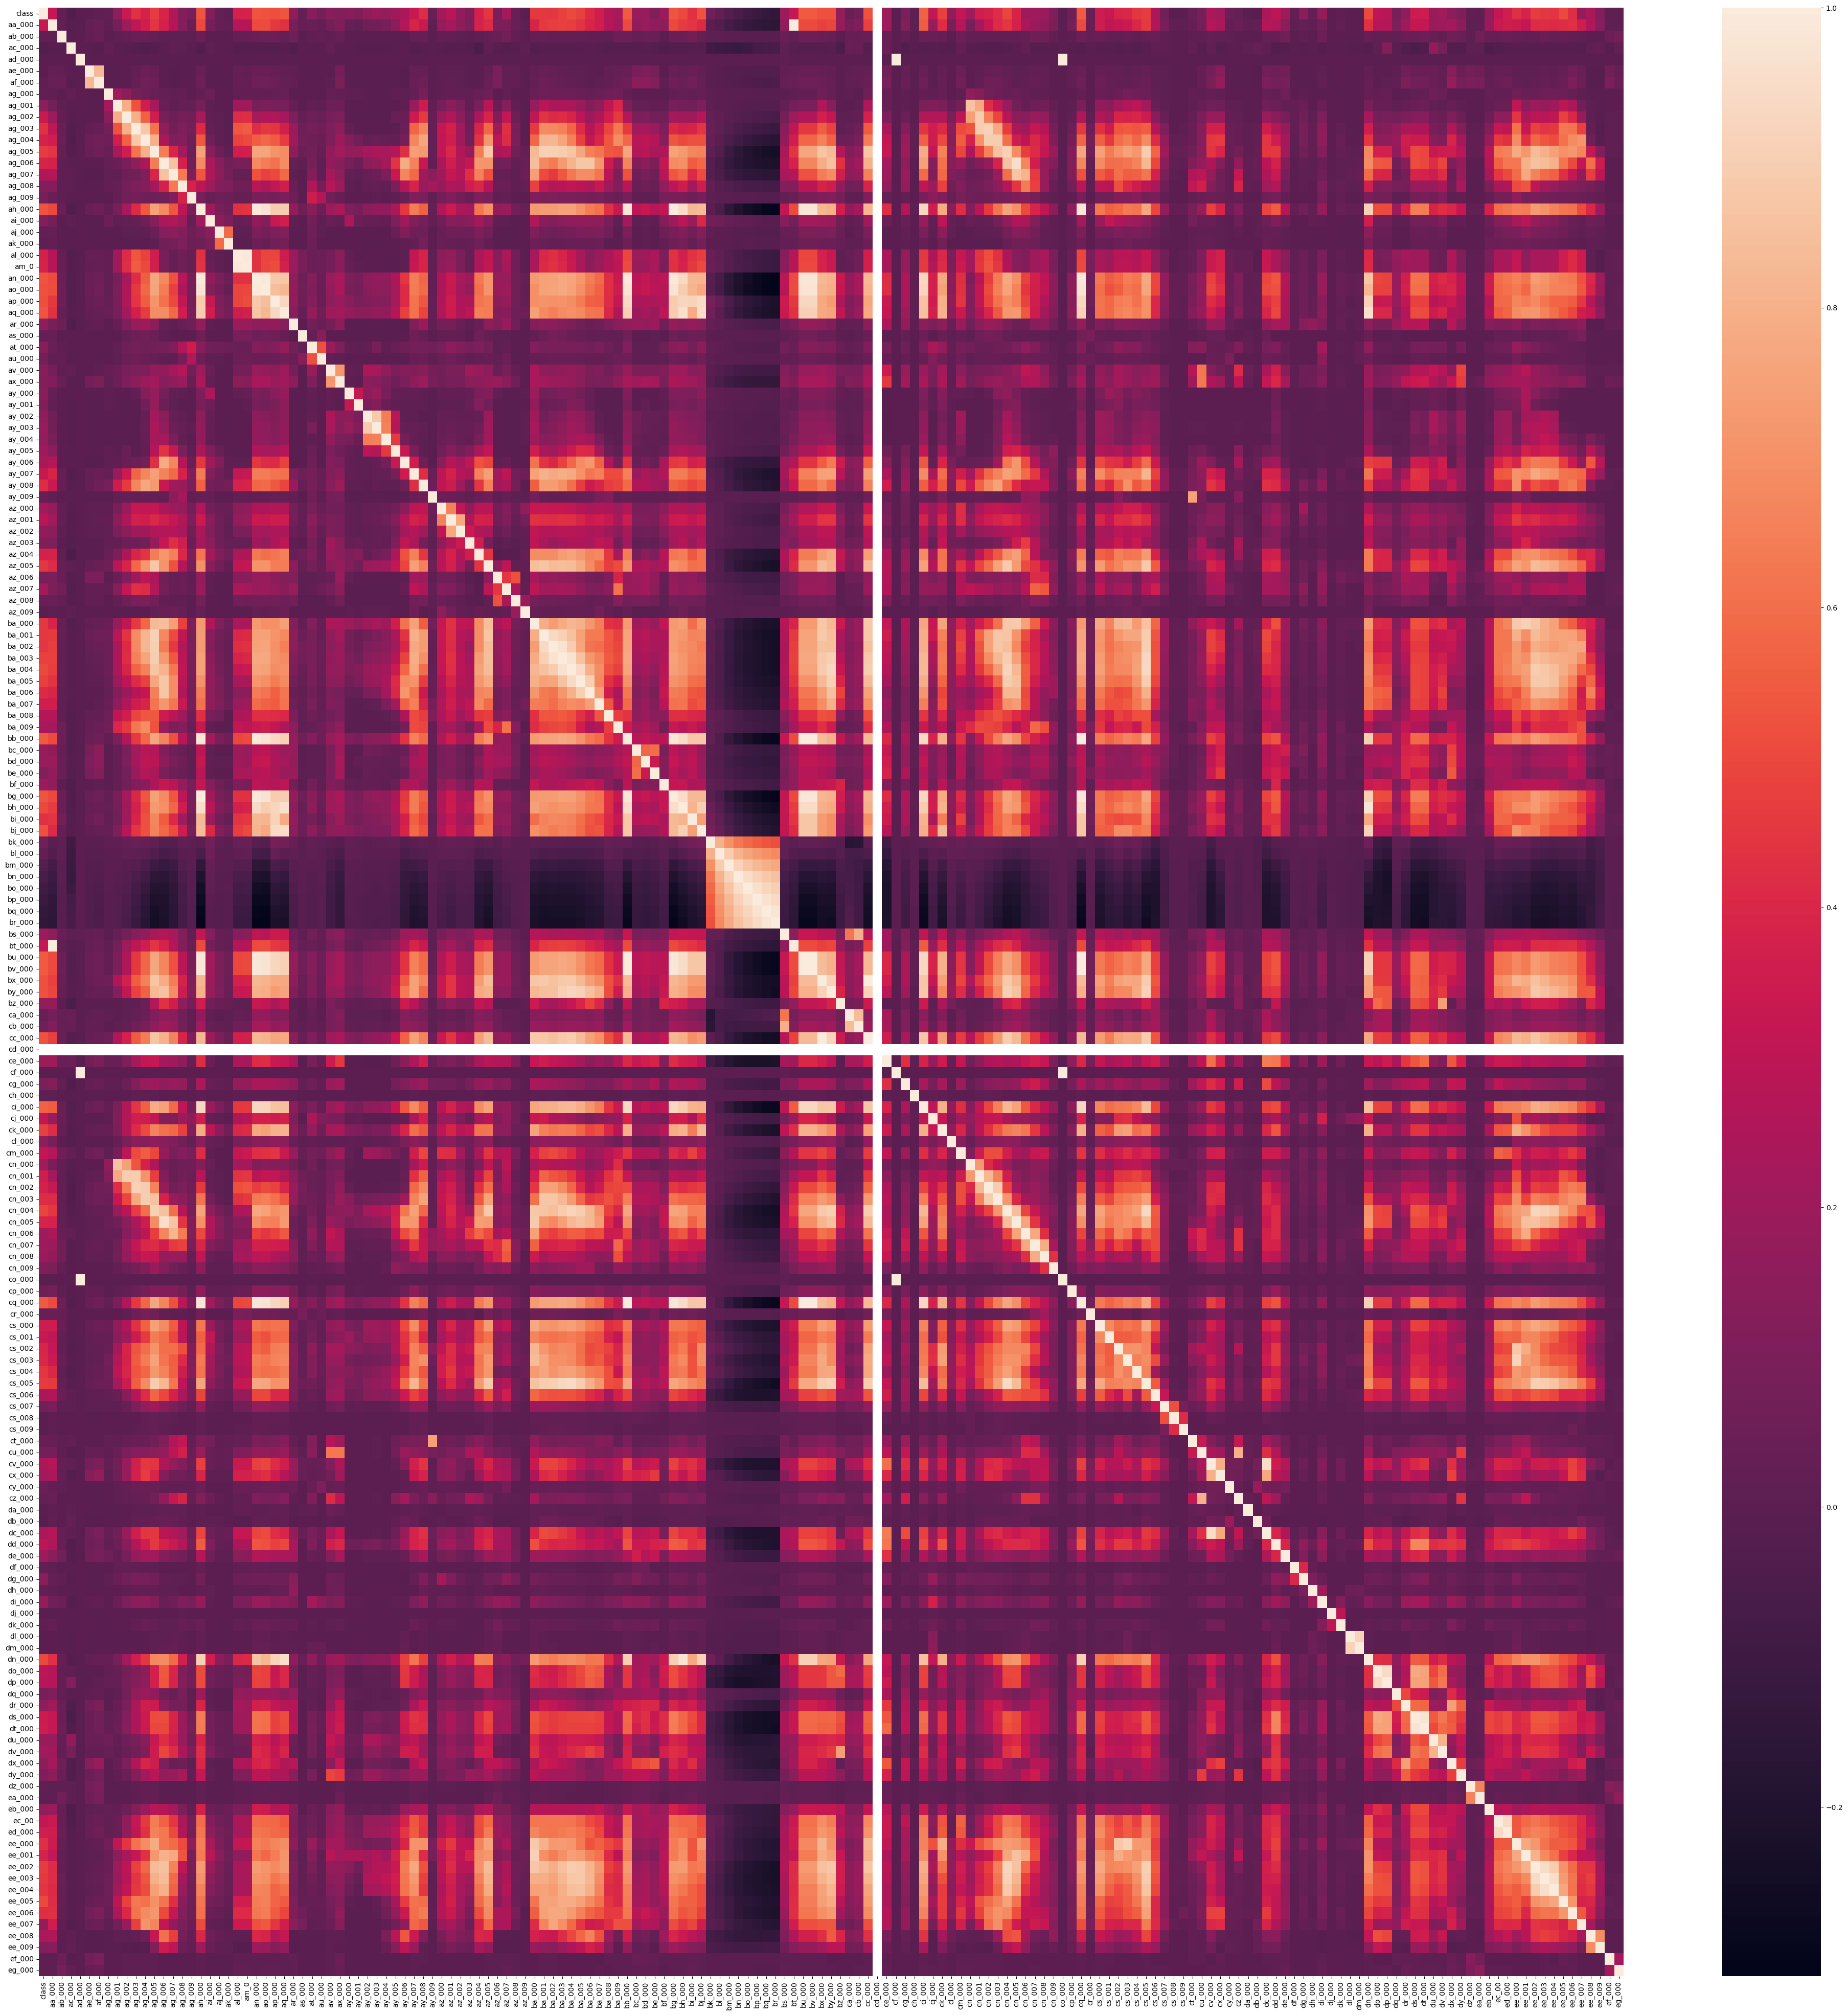

In [16]:
plt.figure(figsize=(50,50))
sns.heatmap(corr)
plt.show()

#### (iv) Make scatter plots and box plots

In [17]:
coeff_var_pd = coeff_var_pd.sort_values('coeff_var',ascending = False)

In [18]:
count = math.floor(math.sqrt(170))
top_cols = coeff_var_pd.iloc[:count,:]

In [19]:
top_cols

col   coeff_var
92   cf_000  194.437044
110  co_000  194.087891
4    ad_000  193.954031
123  cs_009  193.043765
139  dj_000  120.084110
135  df_000  116.137408
28   as_000  114.463628
137  dh_000  111.945660
7    ag_000   91.350686
30   au_000   86.293013
20   ak_000   78.559476
52   az_009   77.894012
42   ay_009   77.457251

In [20]:
top_cols = top_cols['col'].to_list()
top_cols.append('class')
top_cols_df = df[top_cols]
top_cols_df

cf_000         co_000         ad_000  cs_009  dj_000  df_000  \
0           2.000000     220.000000     280.000000     0.0     0.0     0.0   
1      190221.810984  190515.566938  190620.639314     0.0     0.0     0.0   
2           0.000000       0.000000     100.000000     0.0     0.0     0.0   
3           2.000000       2.000000      66.000000     0.0     0.0     0.0   
4           0.000000     202.000000     458.000000     0.0     0.0     0.0   
...              ...            ...            ...     ...     ...     ...   
75995       2.000000      42.000000     892.000000     0.0     0.0     0.0   
75996       2.000000       0.000000      46.000000     0.0     0.0     0.0   
75997       2.000000     378.000000    1518.000000     0.0     0.0     0.0   
75998       0.000000       0.000000      32.000000     0.0     0.0     0.0   
75999       0.000000       0.000000       4.000000     0.0     0.0     0.0   

       as_000  dh_000  ag_000  au_000  ak_000  az_009  ay_009  class  
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
...       ...     ...     ...     ...     ...     ...     ...    ...  
75995     0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
75996     0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
75997     0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
75998     0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  
75999     0.0     0.0     0.0     0.0     0.0     0.0     0.0    0.0  

[76000 rows x 14 columns]

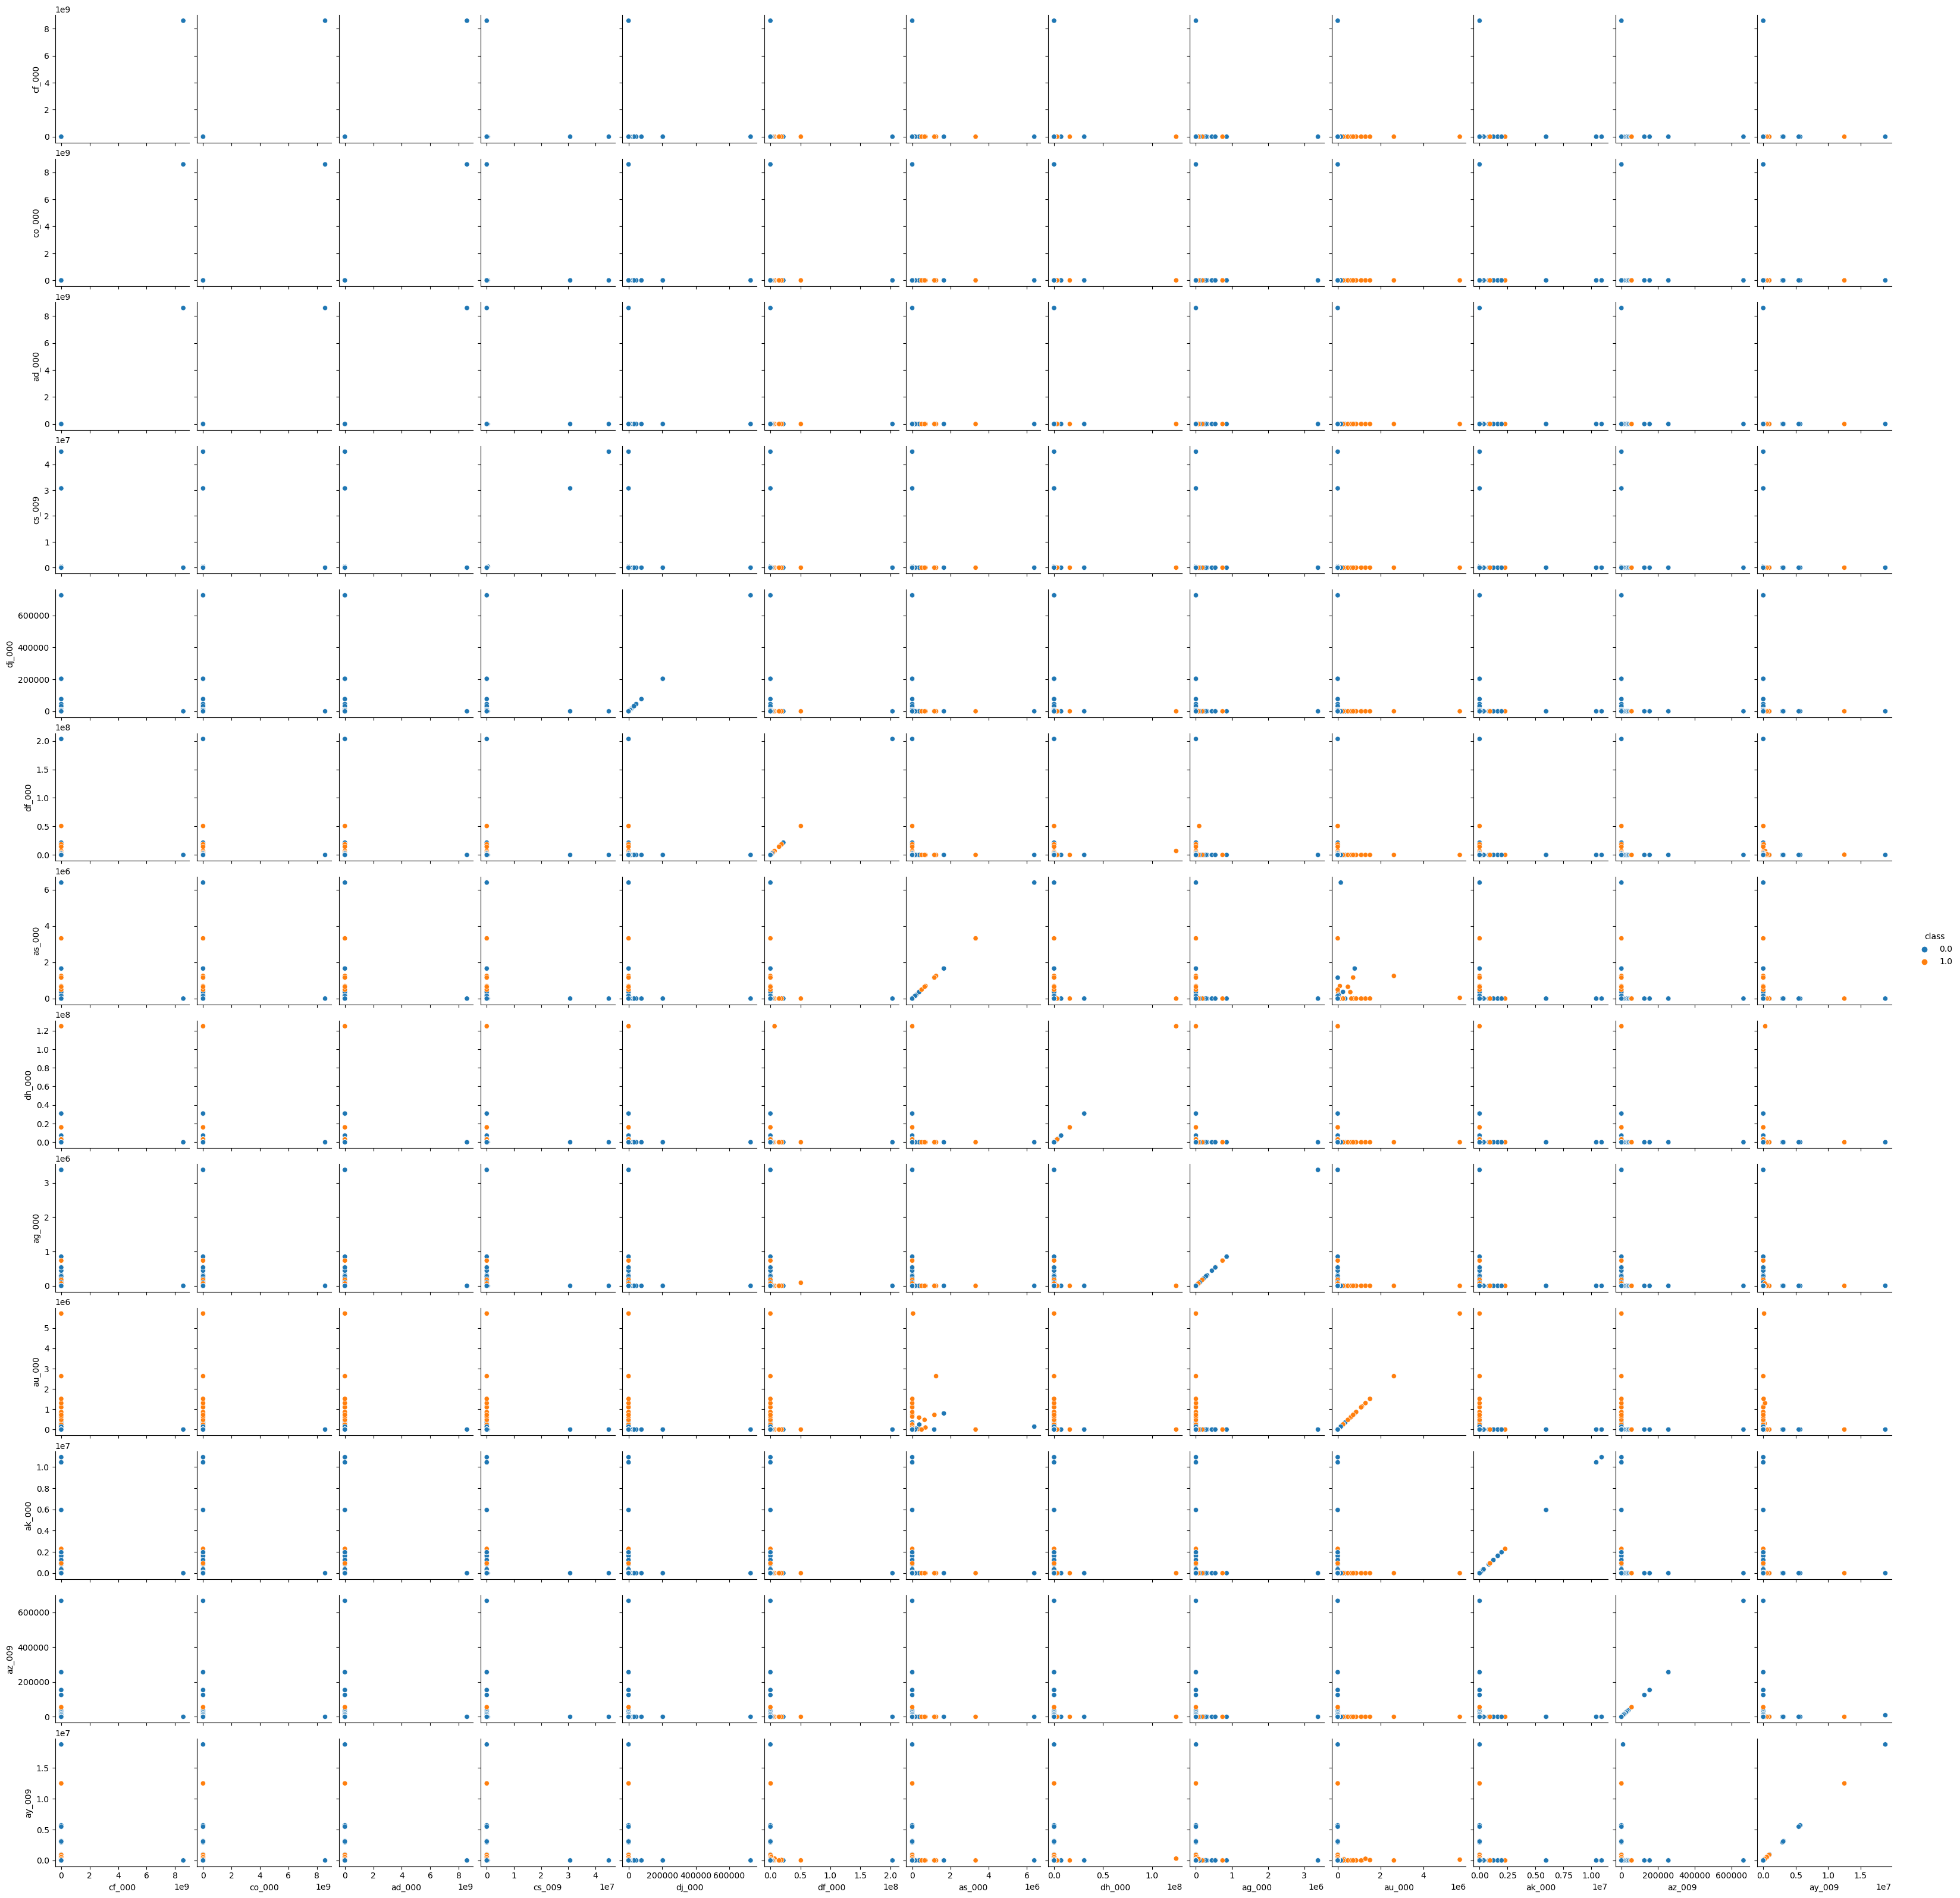

In [21]:
sns.pairplot(df[top_cols], diag_kind=None,hue='class')

It is not possible to draw any conclusions about the features just by observing the scatter plots. We can only say that au_000 clear separation between classes.

<AxesSubplot: >

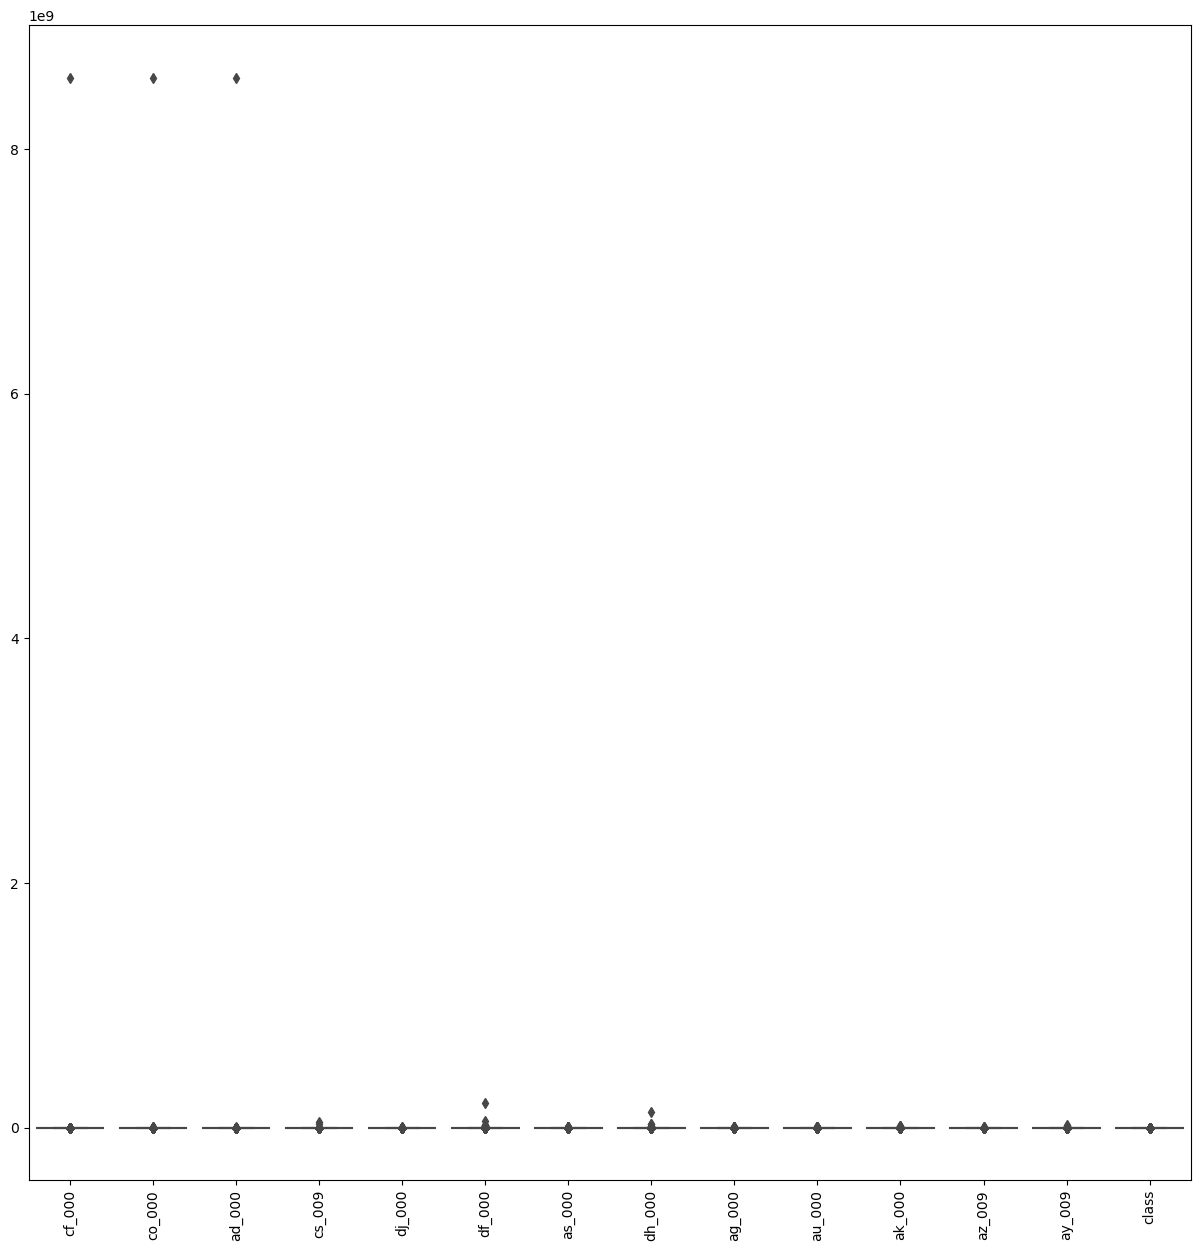

In [22]:
top_cols_df = df[top_cols]
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.boxplot(data=top_cols_df)

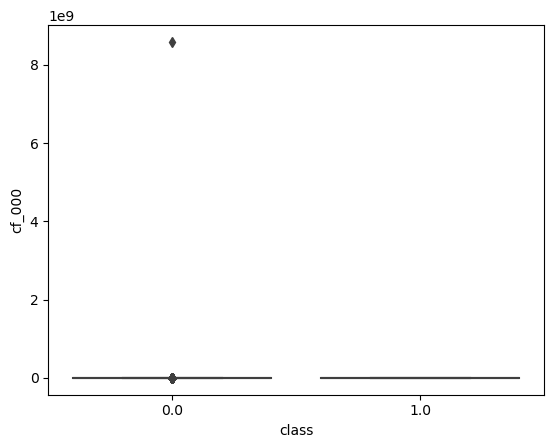

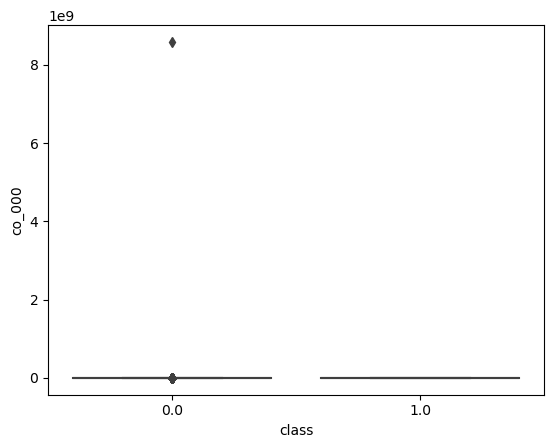

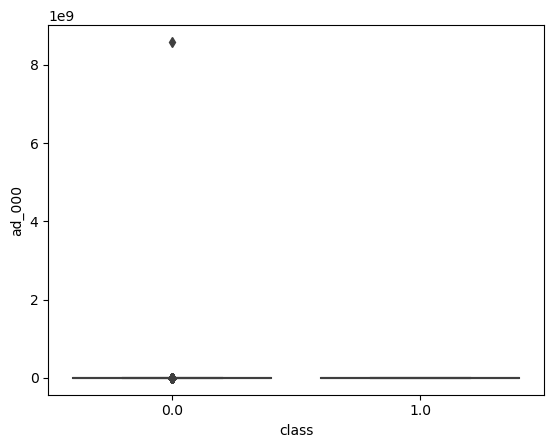

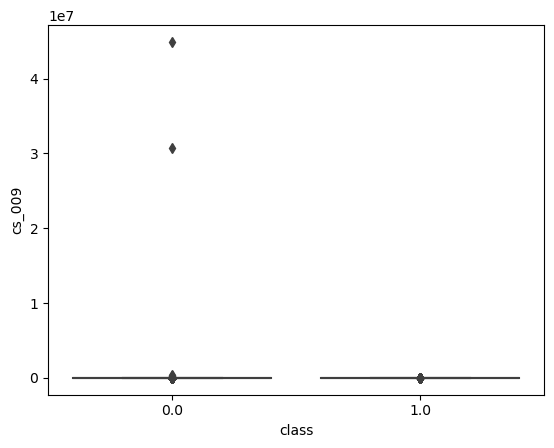

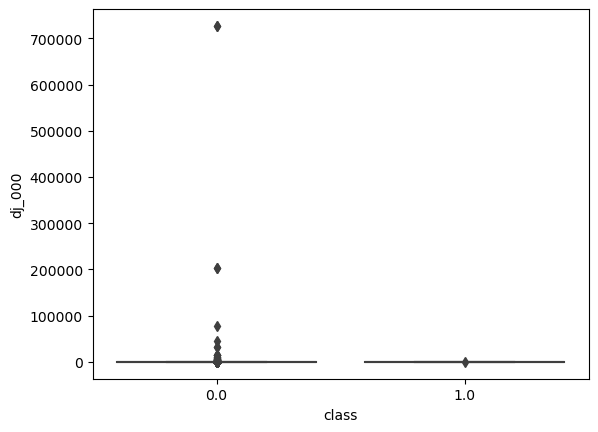

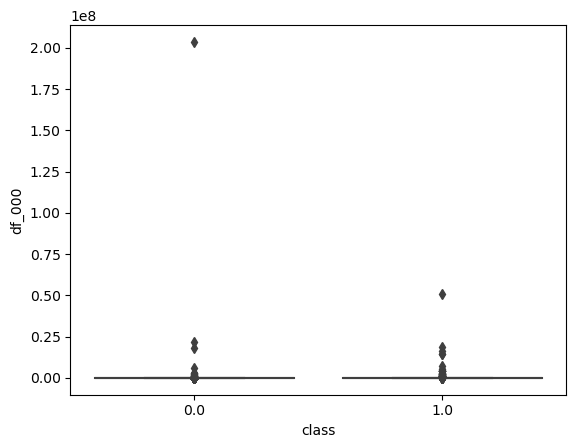

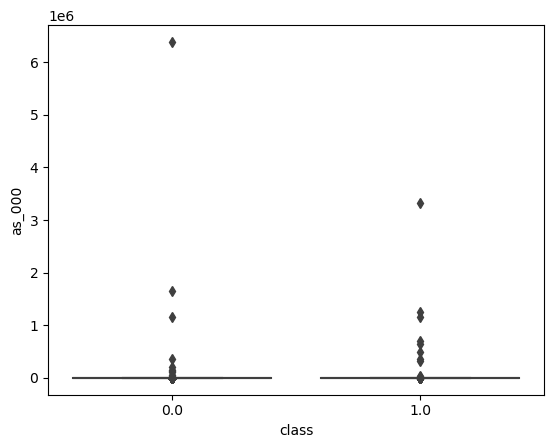

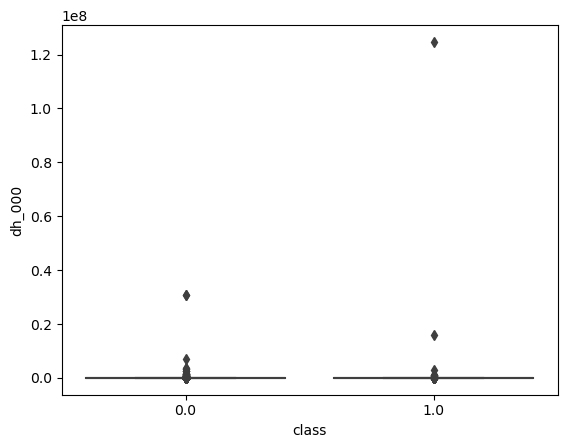

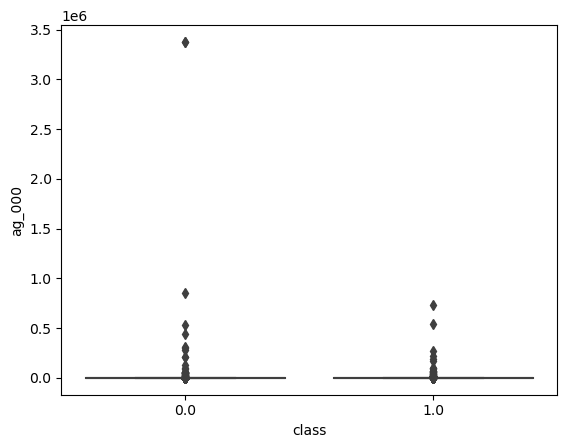

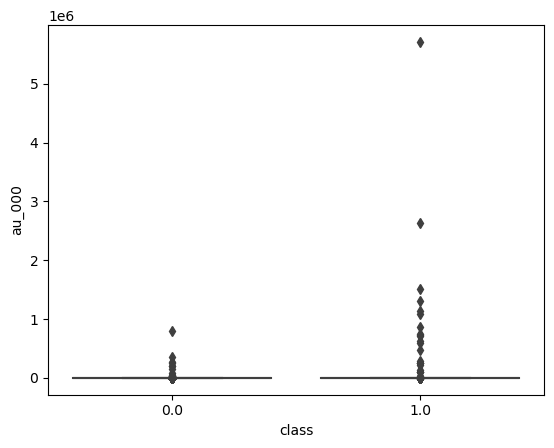

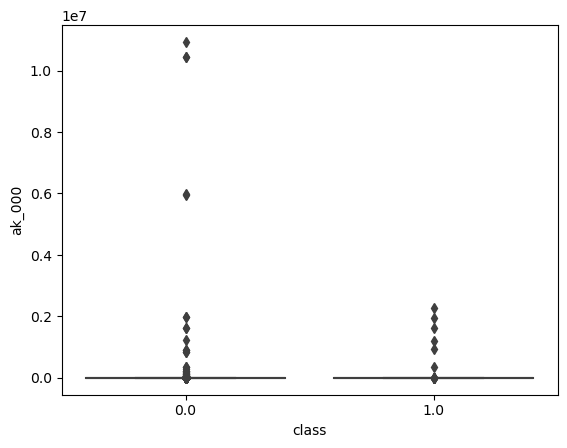

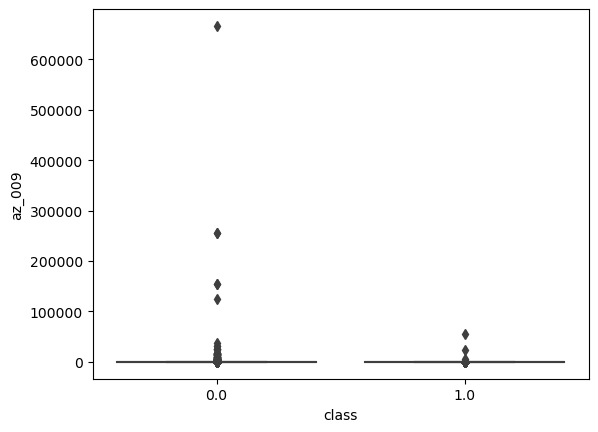

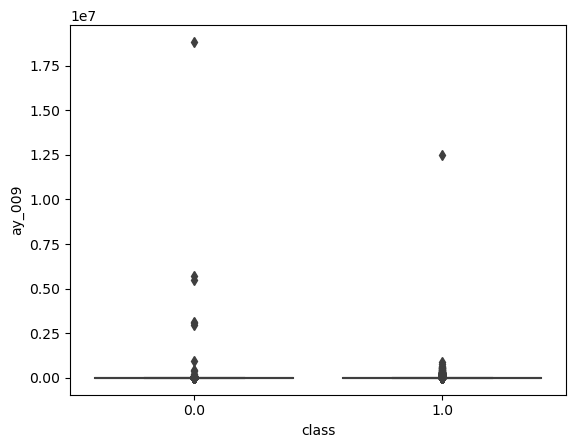

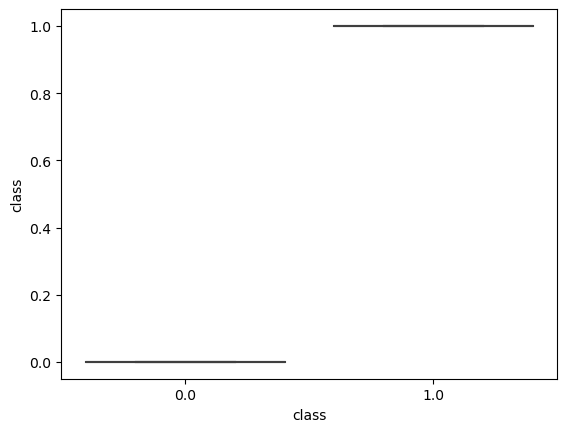

<Figure size 640x480 with 0 Axes>

In [23]:
for col in top_cols:
    sns.boxplot(data=df,y=col,x='class')
    plt.figure()

#### (v) Is this data set imbalanced?

In [24]:
df['class'].value_counts()

0.0    74625
1.0     1375
Name: class, dtype: int64

In [25]:
traindf['class'].value_counts()

0.0    59000
1.0     1000
Name: class, dtype: int64

In [26]:
testdf['class'].value_counts()

0.0    15625
1.0      375
Name: class, dtype: int64

As can be seen the count of the negative class is 74625, while that of the positive class is 1375, therefore it is safe to say that the data set is highly imbalanced.

### (c) Train a random forest

In [27]:
traindf_y = traindf['class']
traindf_x = traindf.drop('class',axis=1)

In [28]:
rf = RandomForestClassifier(random_state = 0, oob_score=True)
rf.fit(traindf_x, traindf_y.ravel())

RandomForestClassifier(oob_score=True, random_state=0)

In [29]:
testdf_y = testdf['class']
testdf_x = testdf.drop('class',axis=1)

In [30]:
from sklearn.metrics import *
from sklearn.preprocessing import *
rf_train_pred = rf.predict(traindf_x)
rf_train_pred = label_binarize(rf_train_pred, classes=[0, 1])
traindf_y = label_binarize(traindf_y, classes=[0, 1])

In [31]:
print("Training Misclassification error:", 1-accuracy_score(traindf_y, rf_train_pred))

Training Misclassification error: 0.0


In [32]:
print(classification_report(traindf_y, rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [33]:
cm = confusion_matrix(traindf_y, rf_train_pred)

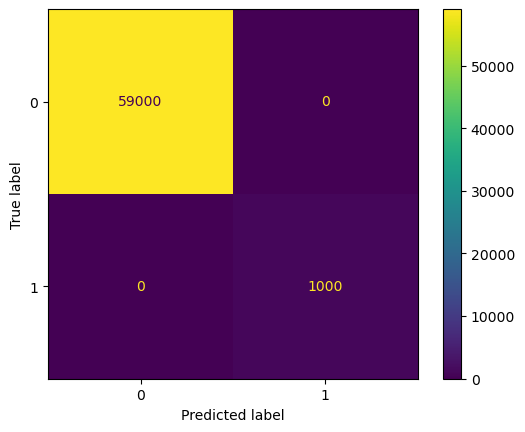

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [35]:
rf_test_pred = rf.predict(testdf_x)
rf_test_pred = label_binarize(rf_test_pred, classes=[0, 1])
testdf_y = label_binarize(testdf_y, classes=[0, 1])

In [36]:
print("Test Misclassification error:",1-accuracy_score(testdf_y, rf_test_pred))

Test Misclassification error: 0.007937500000000042


In [37]:
print(classification_report(testdf_y, rf_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.93      0.71      0.81       375

    accuracy                           0.99     16000
   macro avg       0.96      0.86      0.90     16000
weighted avg       0.99      0.99      0.99     16000



In [38]:
cm = confusion_matrix(testdf_y, rf_test_pred)

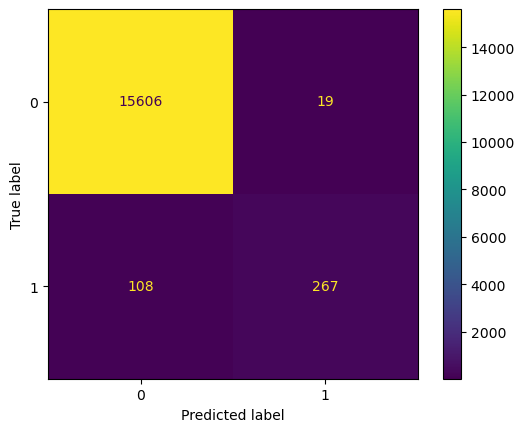

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Training AUC: 1.0


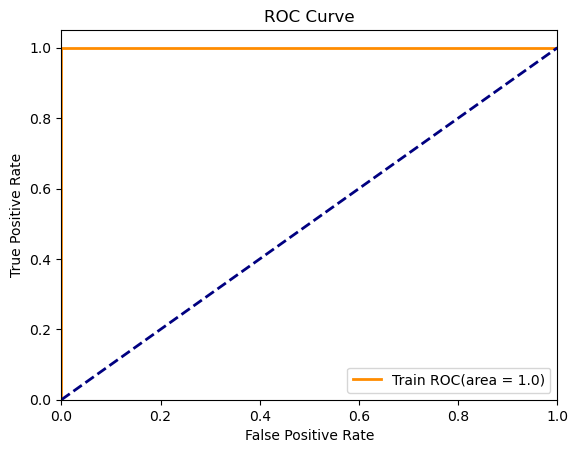

In [40]:
n_classes = rf_test_pred.shape[1]
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()
rf_train_score = rf.predict_proba(traindf_x)

for i in range(2):
    train_fpr[i], train_tpr[i], _ = roc_curve(traindf_y[:,0], rf_train_score[:,i])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])

train_fpr["micro"], train_tpr["micro"], _ = roc_curve(traindf_y.ravel(), rf_train_score[:,1].ravel())
train_roc_auc["micro"] = auc(train_fpr["micro"], train_tpr["micro"])

print("Training AUC:", train_roc_auc[1])

plt.figure()
lw = 2
plt.plot(
    train_fpr[1],
    train_tpr[1],
    color="darkorange",
    lw=lw,
    label="Train ROC(area = %0.1f)" % train_roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Test AUC: 0.9931100159999999


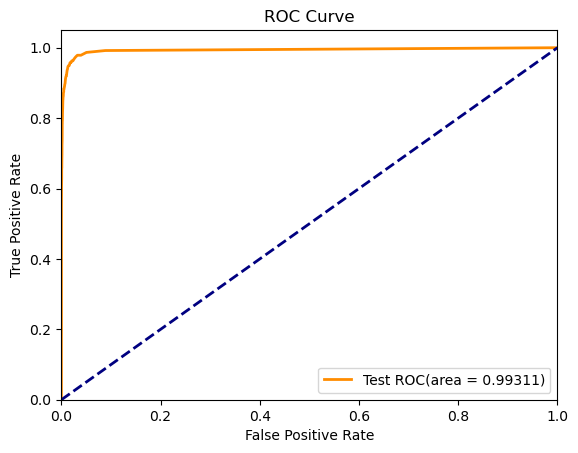

In [41]:
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
rf_test_score = rf.predict_proba(testdf_x)

for i in range(2):
    test_fpr[i], test_tpr[i], _ = roc_curve(testdf_y[:,0], rf_test_score[:,i])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])

test_fpr["micro"], test_tpr["micro"], _ = roc_curve(testdf_y.ravel(), rf_test_score[:,1].ravel())
test_roc_auc["micro"] = auc(test_fpr["micro"], test_tpr["micro"])

print("Test AUC:", test_roc_auc[1])

plt.figure()
lw = 2
plt.plot(
    test_fpr[1],
    test_tpr[1],
    color="darkorange",
    lw=lw,
    label="Test ROC(area = %0.5f)" % test_roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [42]:
print("Out of bag error:",1-rf.oob_score_)

Out of bag error: 0.006033333333333335


Out of bag error is lesser than the test misclassification error but not by much, they are comparable, this indicates that the model is performing well on both training and test data, and is likely to generalize well on new data.

### (d) Research class imbalance in random forest

Class imbalance can be addressed in the following ways:

1.Bagging for Imbalanced Classification

    Standard Bagging
    
    Bagging With Random Undersampling
    
2.Random Forest for Imbalanced Classification

    Standard Random Forest
    
    Random Forest With Class Weighting
    
    Random Forest With Bootstrap Class Weighting
    
    Random Forest With Random Undersampling
    
3.Easy Ensemble for Imbalanced Classification

    Easy Ensemble
    
4.SMOTE
    
Using Random Forest With Bootstrap Class Weighting.

In [43]:
rf = RandomForestClassifier(random_state = 0, oob_score=True, class_weight='balanced_subsample')
rf.fit(traindf_x, traindf_y.ravel())

RandomForestClassifier(class_weight='balanced_subsample', oob_score=True,
                       random_state=0)

In [44]:
rf_train_pred = rf.predict(traindf_x)
rf_train_pred = label_binarize(rf_train_pred, classes=[0, 1])
traindf_y = label_binarize(traindf_y, classes=[0, 1])

In [45]:
print("Training Misclassification error:", 1-accuracy_score(traindf_y, rf_train_pred))

Training Misclassification error: 0.0


In [46]:
print(classification_report(traindf_y, rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [47]:
cm = confusion_matrix(traindf_y, rf_train_pred)

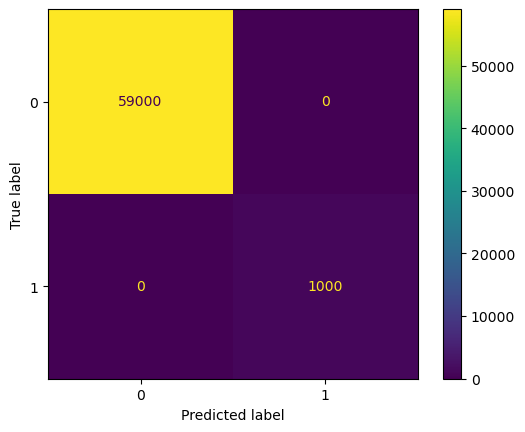

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [49]:
rf_test_pred = rf.predict(testdf_x)
rf_test_pred = label_binarize(rf_test_pred, classes=[0, 1])
testdf_y = label_binarize(testdf_y, classes=[0, 1])

In [50]:
print("Test Misclassification error:",1-accuracy_score(testdf_y, rf_test_pred))

Test Misclassification error: 0.010437499999999988


In [51]:
print(classification_report(testdf_y, rf_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.94      0.59      0.73       375

    accuracy                           0.99     16000
   macro avg       0.97      0.79      0.86     16000
weighted avg       0.99      0.99      0.99     16000



In [52]:
cm = confusion_matrix(testdf_y, rf_test_pred)

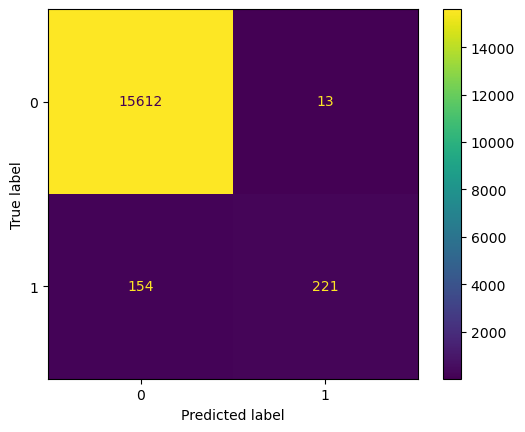

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Training AUC: 1.0


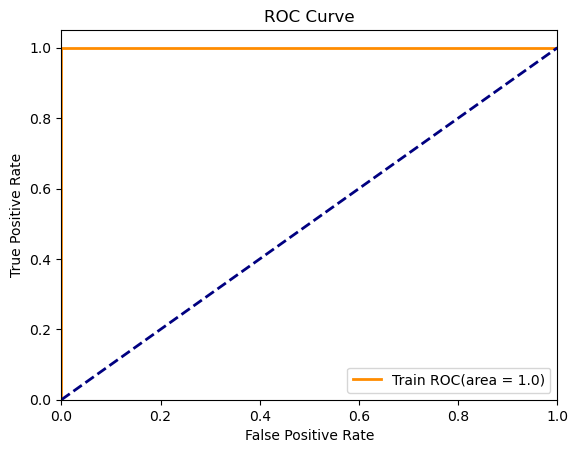

In [54]:
n_classes = rf_test_pred.shape[1]
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()

rf_train_score = rf.predict_proba(traindf_x)
                               
for i in range(2):
    train_fpr[i], train_tpr[i], _ = roc_curve(traindf_y[:,0], rf_train_score[:,i])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])

train_fpr["micro"], train_tpr["micro"], _ = roc_curve(traindf_y.ravel(), rf_train_score[:,1].ravel())
train_roc_auc["micro"] = auc(train_fpr["micro"], train_tpr["micro"])

print("Training AUC:", train_roc_auc[1])

plt.figure()
lw = 2
plt.plot(
    train_fpr[1],
    train_tpr[1],
    color="darkorange",
    lw=lw,
    label="Train ROC(area = %0.1f)" % train_roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Test AUC: 0.9904689493333333


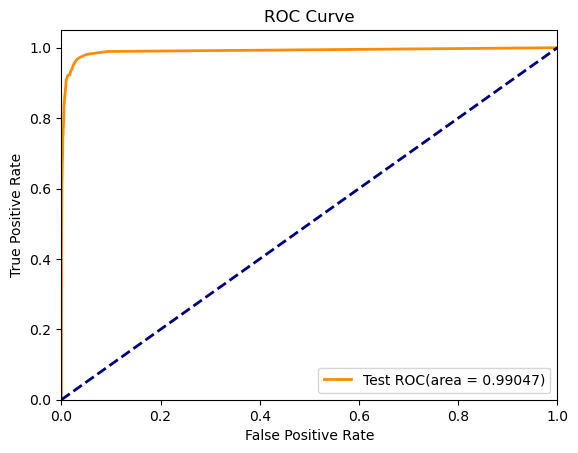

In [55]:
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
rf_test_score = rf.predict_proba(testdf_x)

for i in range(2):
    test_fpr[i], test_tpr[i], _ = roc_curve(testdf_y[:,0], rf_test_score[:,i])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])

test_fpr["micro"], test_tpr["micro"], _ = roc_curve(testdf_y.ravel(), rf_test_score[:,1].ravel())
test_roc_auc["micro"] = auc(test_fpr["micro"], test_tpr["micro"])

print("Test AUC:", test_roc_auc[1])

plt.figure()
lw = 2
plt.plot(
    test_fpr[1],
    test_tpr[1],
    color="darkorange",
    lw=lw,
    label="Test ROC(area = %0.5f)" % test_roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [56]:
print("Out of bag error:",1-rf.oob_score_)

Out of bag error: 0.007716666666666705


Out of bag error is less than test error.

The imbalanced model has less test error and less out of bag error too, and it also has more test AUC. The inherent imbalance in the data set may be the reason that the uncompensated model(model with imbalanced data) works better as there is a possibility that the model classifies a sample to the dominant class(neg class) to reach higher accuracy.

### (e) XGBoost and Model Trees

In [57]:
train_matrix = xgb.DMatrix(data=traindf_x,label=traindf_y)
params = {'objective':'binary:logistic' }
alpha = [10**i for i in np.arange(-4, 4, 0.25).tolist()]
rmse_l1=[]
for a in alpha:
    params['alpha'] = a
    cv_results = xgb.cv(dtrain=train_matrix, params=params, nfold=5, metrics="rmse", seed=0)
    rmse_l1.append(cv_results['test-rmse-mean'].tail(1).values[0])

In [58]:
best_alpha=np.argmin(rmse_l1)
print("Best l1 alpha:", alpha[best_alpha])

Best l1 alpha: 0.1778279410038923


In [59]:
test_matrix = xgb.DMatrix(data=testdf_x,label=testdf_y)

In [60]:
params = {'objective':'binary:logistic', 'alpha':best_alpha}
mod = xgb.train(params=params,dtrain=train_matrix)

Training error: 0.005499999999999949
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       0.95      0.71      0.81      1000

    accuracy                           0.99     60000
   macro avg       0.97      0.85      0.90     60000
weighted avg       0.99      0.99      0.99     60000



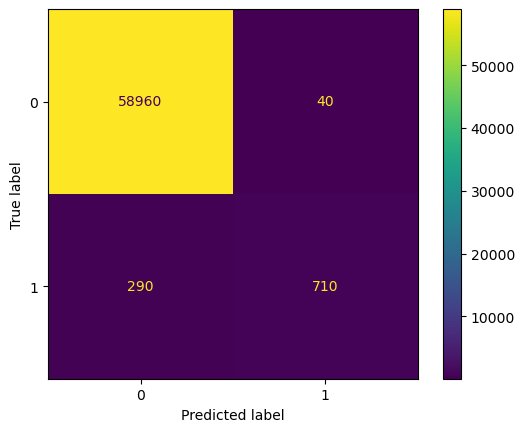

In [61]:
xgb_pred_train_score = mod.predict(train_matrix)
xgb_pred = np.round_(xgb_pred_train_score,decimals=0)
xgb_pred = label_binarize(xgb_pred, classes=[0, 1])

from sklearn.metrics import *
cm = confusion_matrix(traindf_y, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Training error:", 1-accuracy_score(traindf_y, xgb_pred))

print(classification_report(traindf_y, xgb_pred))

Test error: 0.009874999999999967
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.93      0.63      0.75       375

    accuracy                           0.99     16000
   macro avg       0.96      0.81      0.87     16000
weighted avg       0.99      0.99      0.99     16000



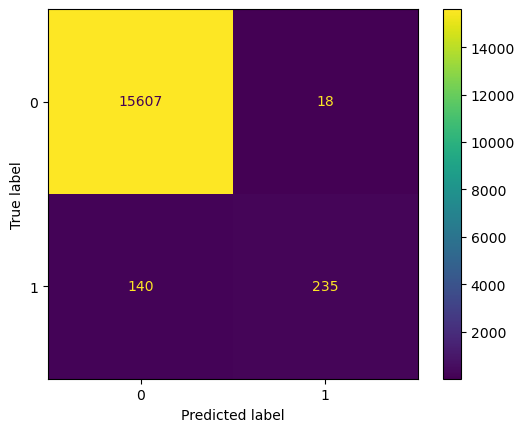

In [62]:
xgb_pred_test_score = mod.predict(test_matrix)
xgb_pred = np.round_(xgb_pred_test_score,decimals=0)
xgb_pred = label_binarize(xgb_pred, classes=[0, 1])

from sklearn.metrics import *
cm = confusion_matrix(testdf_y, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Test error:",1-accuracy_score(testdf_y, xgb_pred))

print(classification_report(testdf_y, xgb_pred))

Training AUC: 0.984560279661017


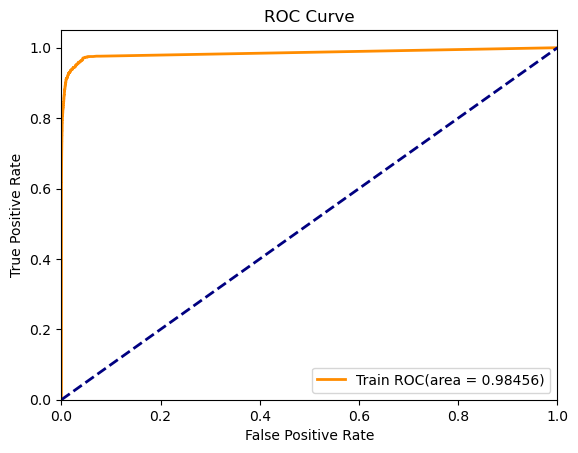

In [63]:
n_classes = xgb_pred.shape[1]
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()

for i in range(2):
    train_fpr[i], train_tpr[i], _ = roc_curve(traindf_y[:,0], xgb_pred_train_score[:])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])

train_fpr["micro"], train_tpr["micro"], _ = roc_curve(traindf_y.ravel(), xgb_pred_train_score.ravel())
train_roc_auc["micro"] = auc(train_fpr["micro"], train_tpr["micro"])

print("Training AUC:", train_roc_auc[1])

plt.figure()
lw = 2
plt.plot(
    train_fpr[1],
    train_tpr[1],
    color="darkorange",
    lw=lw,
    label="Train ROC(area = %0.5f)" % train_roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Test AUC: 0.9944010239999999


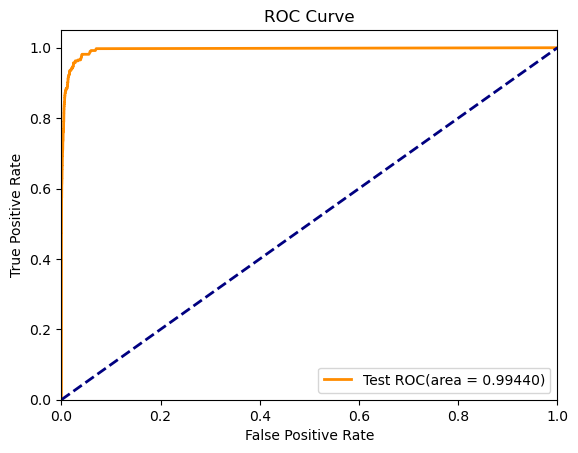

In [64]:
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
for i in range(2):
    test_fpr[i], test_tpr[i], _ = roc_curve(testdf_y[:,0], xgb_pred_test_score[:])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])

test_fpr["micro"], test_tpr["micro"], _ = roc_curve(testdf_y.ravel(), xgb_pred_test_score.ravel())
test_roc_auc["micro"] = auc(test_fpr["micro"], test_tpr["micro"])

print("Test AUC:", test_roc_auc[1])

plt.figure()
lw = 2
plt.plot(
    test_fpr[1],
    test_tpr[1],
    color="darkorange",
    lw=lw,
    label="Test ROC(area = %0.5f)" % test_roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

The testing error is more than the training error.

### (f) Use SMOTE to pre-process your data

In [65]:
xgb_pipe = Pipeline([('smote', SMOTE(random_state=65)), ('xgb_classifier', xgb.XGBClassifier())])
parameters = {'xgb_classifier__objective':['binary:logistic'], 'xgb_classifier__alpha':[10**i for i in np.arange(-4, 4, 1).tolist()]}

In [66]:
grid_xgb = GridSearchCV(xgb_pipe, parameters, scoring = 'f1')
grid_xgb.fit(traindf_x, traindf_y)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=65)),
                                       ('xgb_classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                        

In [67]:
best_alpha = list(grid_xgb.best_params_.values())[0]
print("Best alpha:", best_alpha)
print("CV Score:", grid_xgb.best_score_)

Best alpha: 0.1
CV Score: 0.8080527765715309


In [68]:
print(grid_xgb.best_estimator_)

Pipeline(steps=[('smote', SMOTE(random_state=65)),
                ('xgb_classifier',
                 XGBClassifier(alpha=0.1, base_score=None, booster=None,
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=Non

Training Error: 1.666666666666483e-05
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



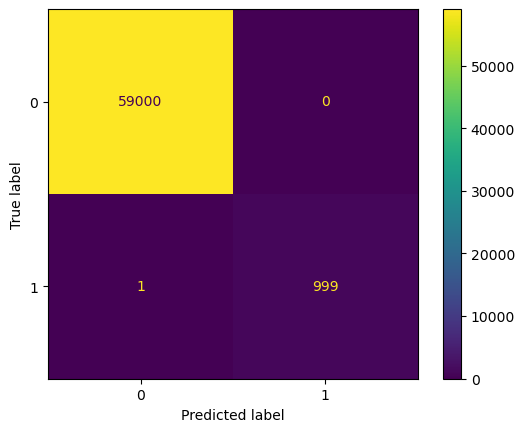

In [69]:
smote_xgb_pred_train_score = grid_xgb.best_estimator_.predict_proba(traindf_x)
xgb_pred = np.round_(smote_xgb_pred_train_score,decimals=0)
xgb_pred =label_binarize(xgb_pred, classes=[0, 1])

cm = confusion_matrix(traindf_y, xgb_pred[:,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Training Error:", 1-accuracy_score(traindf_y, xgb_pred[:,1]))

print(classification_report(traindf_y, xgb_pred[:,1]))

In [70]:
smote_xgb_pred_test_score = grid_xgb.best_estimator_.predict_proba(testdf_x)

Test Error: 0.0068749999999999645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.87      0.83      0.85       375

    accuracy                           0.99     16000
   macro avg       0.93      0.91      0.92     16000
weighted avg       0.99      0.99      0.99     16000



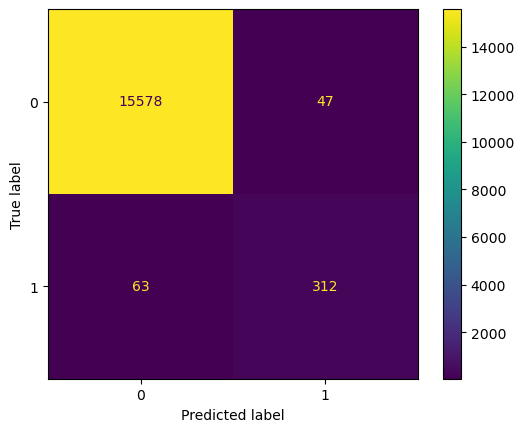

In [71]:
xgb_pred = np.round_(smote_xgb_pred_test_score,decimals=0)
xgb_pred = label_binarize(xgb_pred, classes=[0, 1])

cm = confusion_matrix(testdf_y, xgb_pred[:,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Test Error:",1-accuracy_score(testdf_y, xgb_pred[:,1]))

print(classification_report(testdf_y, xgb_pred[:,1]))

Training AUC: 1.0


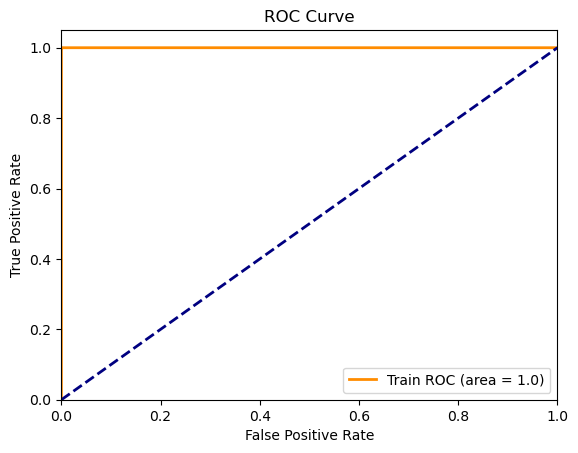

In [72]:
n_classes = xgb_pred.shape[1]
train_fpr = dict()
train_tpr = dict()
train_roc_auc = dict()

for i in range(2):
    train_fpr[i], train_tpr[i], _ = roc_curve(traindf_y, smote_xgb_pred_train_score[:,1])
    train_roc_auc[i] = auc(train_fpr[i], train_tpr[i])

train_fpr["micro"], train_tpr["micro"], _ = roc_curve(traindf_y, smote_xgb_pred_train_score[:,1])
train_roc_auc["micro"] = auc(train_fpr["micro"], train_tpr["micro"])

print("Training AUC:", round(train_roc_auc[1],1))

plt.figure()
lw = 2
plt.plot(
    train_fpr[1],
    train_tpr[1],
    color="darkorange",
    lw=lw,
    label="Train ROC (area = %0.1f)" % train_roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Test AUC: 0.9938139306666667


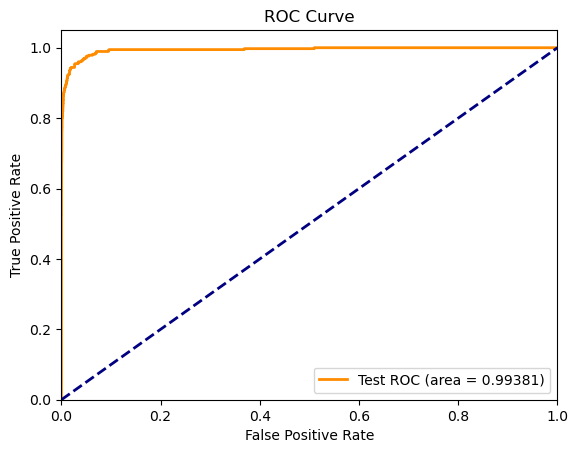

In [73]:
test_fpr = dict()
test_tpr = dict()
test_roc_auc = dict()
for i in range(2):
    test_fpr[i], test_tpr[i], _ = roc_curve(testdf_y[:,0], smote_xgb_pred_test_score[:,1])
    test_roc_auc[i] = auc(test_fpr[i], test_tpr[i])

test_fpr["micro"], test_tpr["micro"], _ = roc_curve(testdf_y.ravel(), smote_xgb_pred_test_score[:,1])
test_roc_auc["micro"] = auc(test_fpr["micro"], test_tpr["micro"])

print("Test AUC:", test_roc_auc[1])

plt.figure()
lw = 2
plt.plot(
    test_fpr[1],
    test_tpr[1],
    color="darkorange",
    lw=lw,
    label="Test ROC (area = %0.5f)" % test_roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

The test error is slightly more than the training error.

SMOTE helps increase the tpr/recall compared to the xgb where imbalanced dataset is not compensated. 

SMOTE with XGBOOST L1 penalisation recognizes the most number of positive class data out of all the trained models.

## 2. ISLR 6.6.3

a. train RSS

It will decrease steadily. As s increases, the constraint on β decreases until it reaches the least squares value. The model will overfit on train data letting all β to have some value which will lead to least train error.

b. test RSS

Decreases initially and then starts increasing. This happens as initially, the flexibility increases from when s starts increasing from 0 but it later starts getting overfit from more β's being allowed to take value as the value of s starts increasing more and more.

c.variance

It will increase steadily. As s increases, the model flexibility increases which causes variance to increase.

d.squared bias

Decreases steadily. As s increases, the model flexibility increases which causes bias to decrease.

e.irreducible error

It remains constant as it is not related to s.

## 3. ISLR 6.6.5

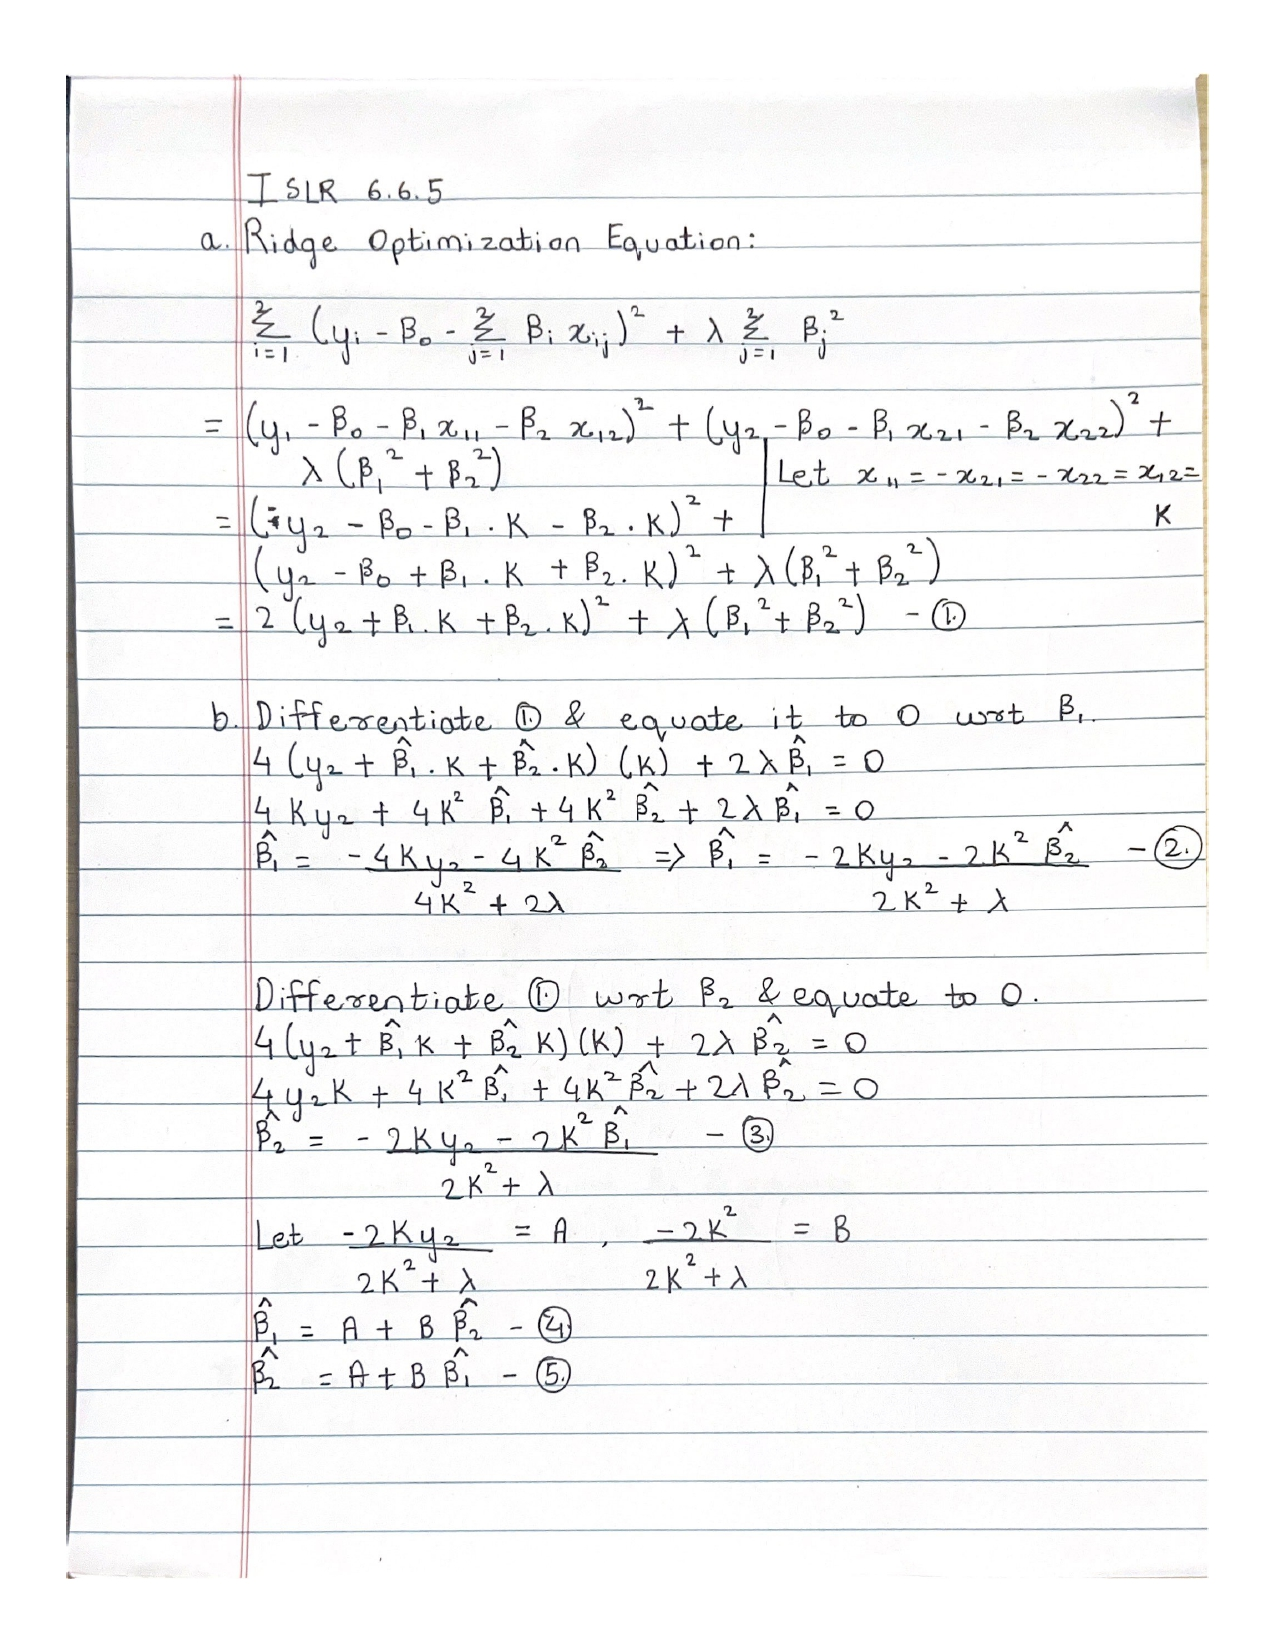

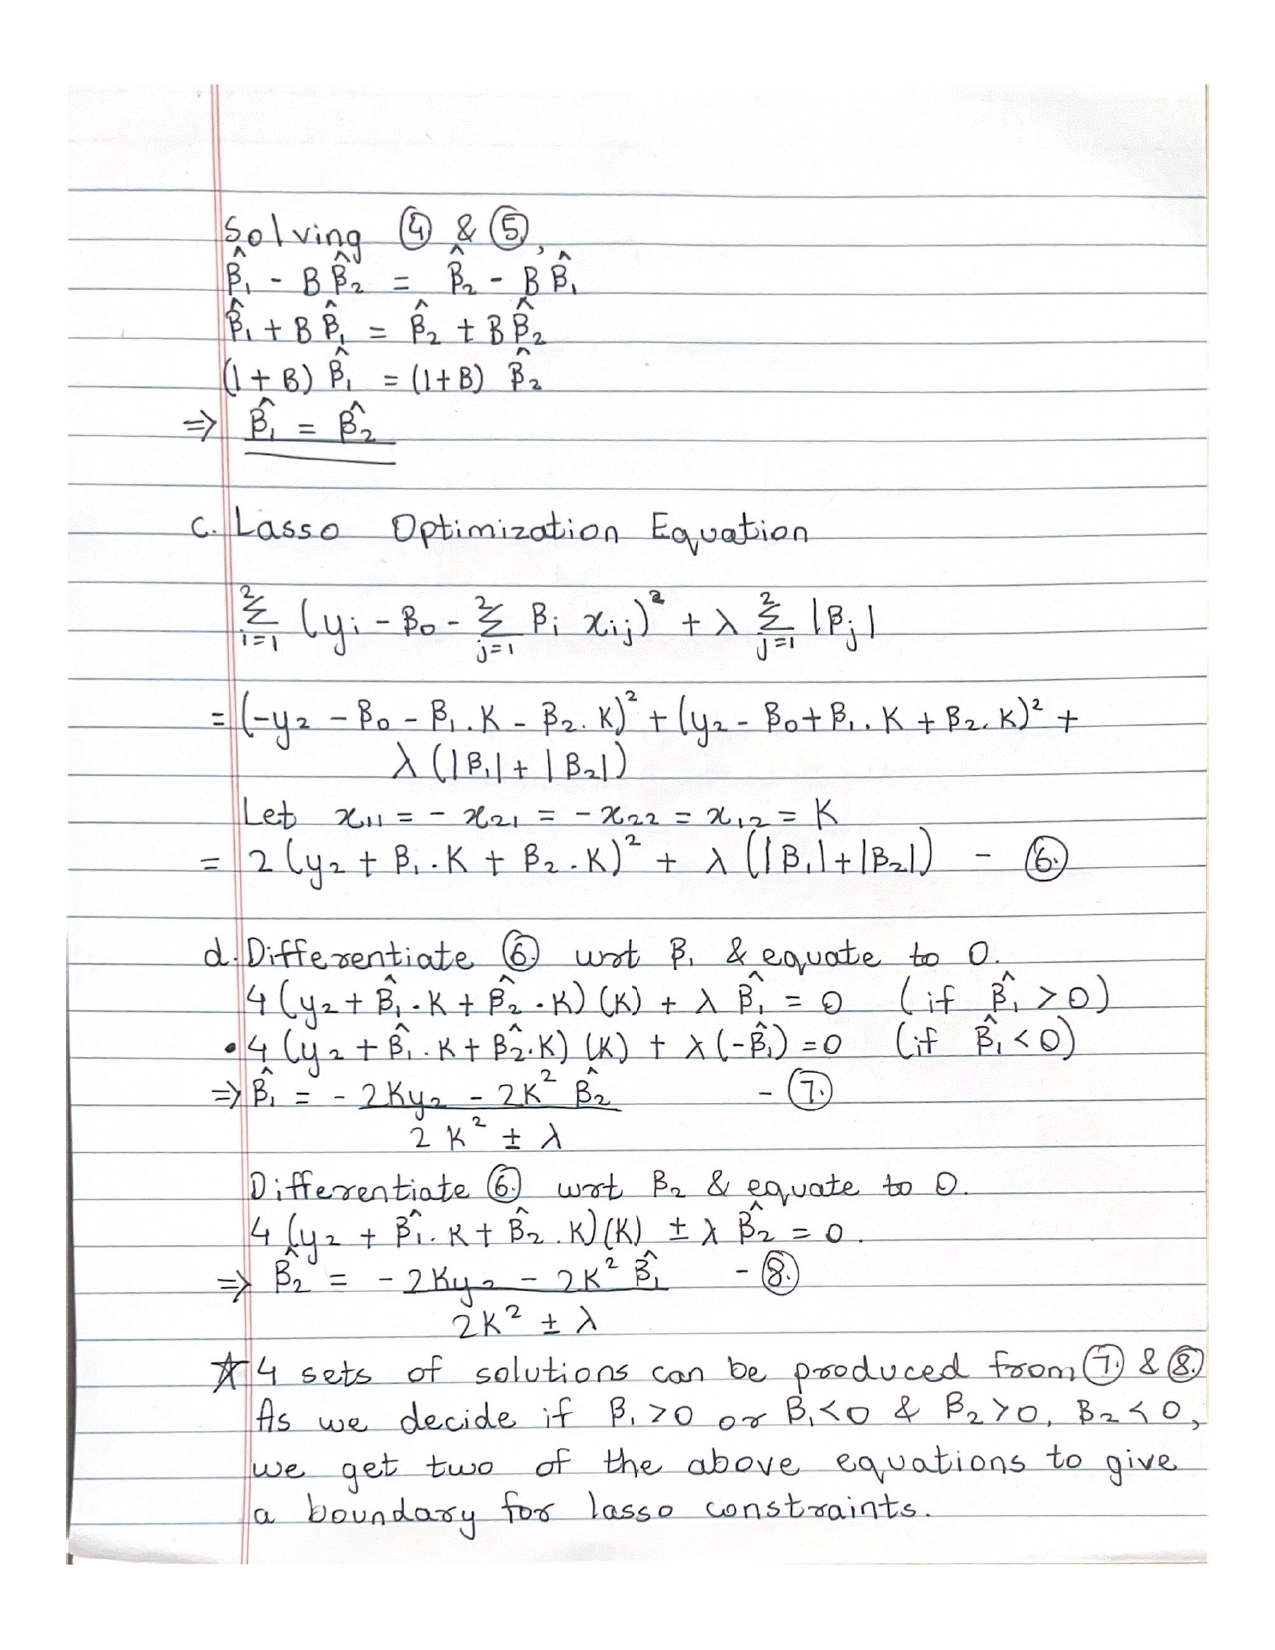

## 4. ISLR 8.4.5

#### Approach 1: Majority Voting:-

no. of samples that belong to class Red (i.e prob of belonging to red >0.5) = 6

no. of samples that do not belong to class Red (i.e prob of belonging to red <0.5) = 4

=> P(class in red|X)= true i.e X belongs to class Red.

#### Approach 2: Average:-

Avg prob of samples = 0.45

=> P(class in red|X)= false i.e X does not belong to class Red.

## 5. ISLR 9.7.3

In [74]:
toy_df = pd.DataFrame({'x1':[3,2,4,1,2,4,4],'x2':[4,2,4,4,1,3,1],'y':['red','red','red','red','blue','blue','blue']})

toy_df

x1  x2     y
0   3   4   red
1   2   2   red
2   4   4   red
3   1   4   red
4   2   1  blue
5   4   3  blue
6   4   1  blue

#### (a)

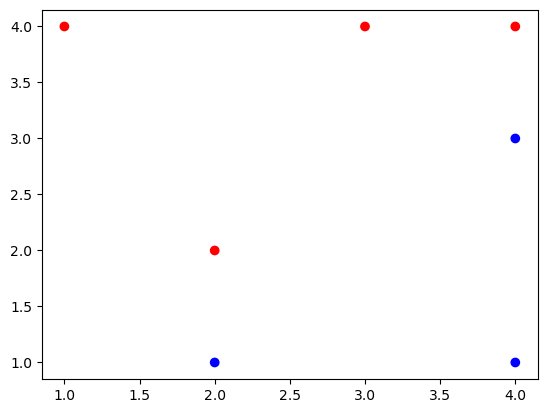

In [75]:
plt.scatter(toy_df['x1'],toy_df['x2'],c=toy_df['y'])

#### (b)

optimal line plane -> x1=x2+0.5


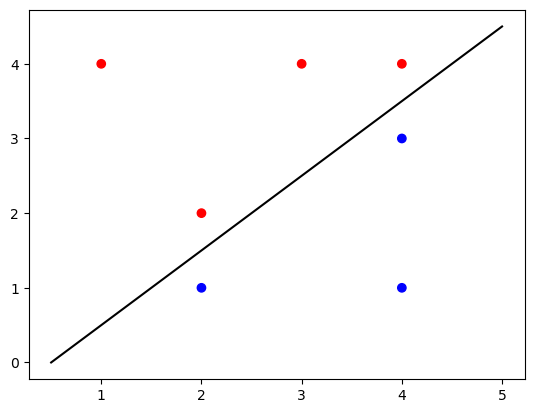

In [76]:
print("optimal line plane -> x1=x2+0.5")
plt.figure()
plt.scatter(toy_df['x1'],toy_df['x2'],c=toy_df['y'])
plt.plot([0.5,5],[0,4.5],color="black")

#### (c)

Classify to blue if x1-x2-0.5>0

Classify to red if x1-x2-0.5<=0

β0 = -0.5

β1 = 1

β2 = -1

#### (d)

optimal line plane -> x1=x2+0.5


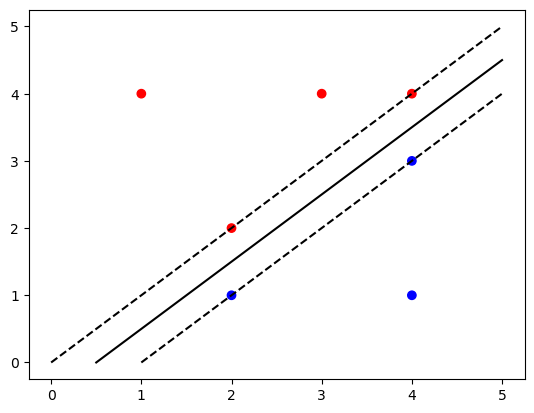

In [77]:
print("optimal line plane -> x1=x2+0.5")
plt.figure()
plt.scatter(toy_df['x1'],toy_df['x2'],c=toy_df['y'])
plt.plot([0.5,5],[0,4.5],color="black")
plt.plot([0,5],[0,5],color="black",linestyle="--")
plt.plot([1,5],[0,4],color="black",linestyle="--")

#### (e)

The support vectors are the points (2,1), (2,2), (4,3) and (4,4).

These are the observations that lie on the dashed lines in the above graph.

#### (f)

Since the 7th observation i.e (4,1) is not a support vector, moving it will not move the original hyperplane. 

#### (g)

optimal line plane -> x1=x2+0.25


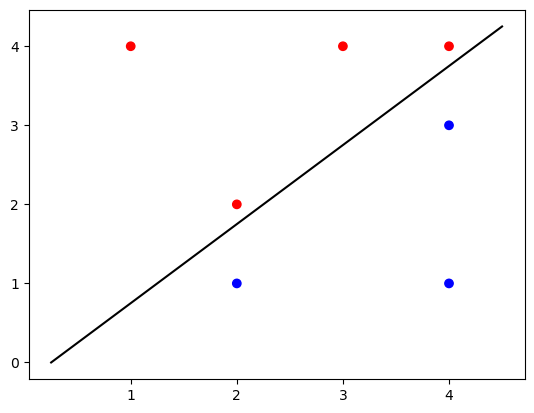

In [78]:
print("optimal line plane -> x1=x2+0.25")
plt.figure()
plt.scatter(toy_df['x1'],toy_df['x2'],c=toy_df['y'])
plt.plot([0.25,4.5],[0,4.25],color="black")

#### (h)

new observation at (1.5,3.0)


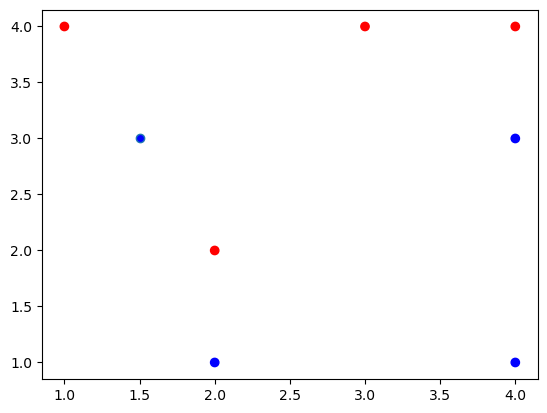

In [79]:
plt.scatter(toy_df['x1'],toy_df['x2'],c=toy_df['y'])
plt.plot([1.5],[3],marker='o',markerfacecolor='blue')
print("new observation at (1.5,3.0)")